In [1]:
# clone SAM2
!git clone https://github.com/facebookresearch/segment-anything-2
%cd segment-anything-2
!pip install -q -e .
%cd ..

Cloning into 'segment-anything-2'...
remote: Enumerating objects: 1070, done.
remote: Total 1070 (delta 0), reused 0 (delta 0), pack-reused 1070 (from 1)
Receiving objects: 100% (1070/1070), 134.70 MiB | 46.25 MiB/s, done.
Resolving deltas: 100% (376/376), done.
/content/segment-anything-2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 14.0 kB/s eta 0:00:00
  Building editable for SAM-2 (pyproject.toml) ... done
/content


In [2]:
# get your kaggle.json file from kaggle settings and place it in this directory
!pip install kaggle
!kaggle datasets download -d ankanghosh651/leaf-sengmentation-dataset-sam2-format

Dataset URL: https://www.kaggle.com/datasets/ankanghosh651/leaf-sengmentation-dataset-sam2-format
License(s): MIT
 43% 22.0M/51.5M [00:00<00:00, 97.7MB/s]
100% 51.5M/51.5M [00:00<00:00, 169MB/s] 


In [3]:
! sudo apt-get install zip unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
zip is already the newest version (3.0-12build2).
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [4]:
!unzip leaf-sengmentation-dataset-sam2-format.zip -d ./leaf-seg

Archive:  leaf-sengmentation-dataset-sam2-format.zip
  inflating: ./leaf-seg/leaf-seg/images/00000.jpg  
  inflating: ./leaf-seg/leaf-seg/images/00001.jpg  
  inflating: ./leaf-seg/leaf-seg/images/00002.jpg  
  inflating: ./leaf-seg/leaf-seg/images/00003.jpg  
  inflating: ./leaf-seg/leaf-seg/images/00004.jpg  
  inflating: ./leaf-seg/leaf-seg/images/00005.jpg  
  inflating: ./leaf-seg/leaf-seg/images/00006.jpg  
  inflating: ./leaf-seg/leaf-seg/images/00007.jpg  
  inflating: ./leaf-seg/leaf-seg/images/00008.jpg  
  inflating: ./leaf-seg/leaf-seg/images/00009.jpg  
  inflating: ./leaf-seg/leaf-seg/images/00010.jpg  
  inflating: ./leaf-seg/leaf-seg/images/00011.jpg  
  inflating: ./leaf-seg/leaf-seg/images/00012.jpg  
  inflating: ./leaf-seg/leaf-seg/images/00013.jpg  
  inflating: ./leaf-seg/leaf-seg/images/00014.jpg  
  inflating: ./leaf-seg/leaf-seg/images/00015.jpg  
  inflating: ./leaf-seg/leaf-seg/images/00016.jpg  
  inflating: ./leaf-seg/leaf-seg/images/00017.jpg  
  inflating

In [5]:
!wget -O sam2_hiera_tiny.pt "https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_tiny.pt"
!wget -O sam2_hiera_small.pt "https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_small.pt"
!wget -O sam2_hiera_base_plus.pt "https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_base_plus.pt"
!wget -O sam2_hiera_large.pt "https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_large.pt"

--2025-03-12 01:23:32--  https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_tiny.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.238.176.19, 18.238.176.126, 18.238.176.44, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.238.176.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155906050 (149M) [application/vnd.snesdev-page-table]
Saving to: ‘sam2_hiera_tiny.pt’

sam2_hiera_tiny.pt  100%[===================>] 148.68M   103MB/s    in 1.4s    

2025-03-12 01:23:34 (103 MB/s) - ‘sam2_hiera_tiny.pt’ saved [155906050/155906050]

--2025-03-12 01:23:34--  https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_small.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.238.176.19, 18.238.176.126, 18.238.176.44, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.238.176.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184309650 (176M) [applic

In [6]:
%cd segment-anything-2

/content/segment-anything-2


In [7]:
pwd

'/content/segment-anything-2'

In [8]:
import os
import random
import pandas as pd
import cv2
import torch
import torch.nn.utils
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor

In [9]:
def set_seeds():
    SEED_VALUE = 42
    random.seed(SEED_VALUE)
    np.random.seed(SEED_VALUE)
    torch.manual_seed(SEED_VALUE)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(SEED_VALUE)
        torch.cuda.manual_seed_all(SEED_VALUE)
        torch.backends.cudnn.deterministic=True
        torch.backends.cudnn.benchmark=True
set_seeds()

In [10]:
# Path to the leaf segmentation dataset folder
data_dir = "../leaf-seg/leaf-seg"
images_dir = os.path.join(data_dir, "images")
masks_dir = os.path.join(data_dir, "masks")

# Load the train.csv file
train_df = pd.read_csv(os.path.join(data_dir, "train.csv"))

# Split the data into two halves: one for training and one for testing
train_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Prepare the training data list
train_data = []
for index, row in train_df.iterrows():
   image_name = row['imageid']
   mask_name = row['maskid']

   # Append image and corresponding mask paths
   train_data.append({
       "image": os.path.join(images_dir, image_name),
       "annotation": os.path.join(masks_dir, mask_name)
   })

# Prepare the testing data list (if needed for inference or evaluation later)
test_data = []
for index, row in test_df.iterrows():
   image_name = row['imageid']
   mask_name = row['maskid']

   # Append image and corresponding mask paths
   test_data.append({
       "image": os.path.join(images_dir, image_name),
       "annotation": os.path.join(masks_dir, mask_name)
   })

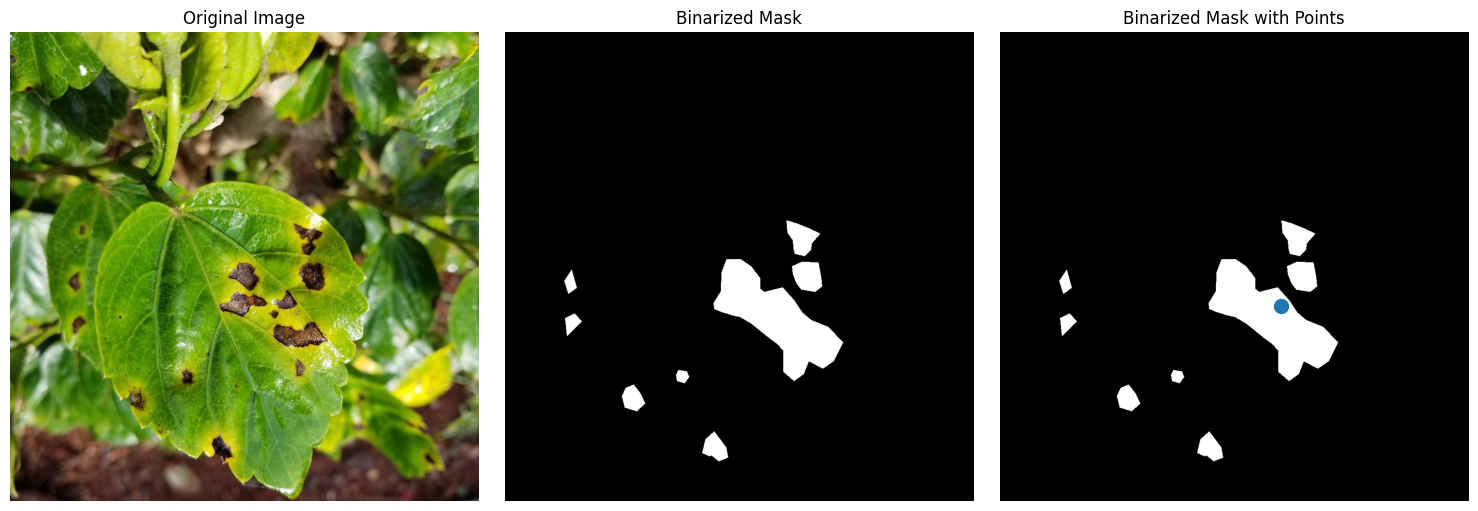

In [11]:
def read_batch(data, visualize_data=True):
   # Select a random entry
   ent = data[np.random.randint(len(data))]

   # Get full paths
   Img = cv2.imread(ent["image"])[..., ::-1]  # Convert BGR to RGB
   ann_map = cv2.imread(ent["annotation"], cv2.IMREAD_GRAYSCALE)  # Read annotation as grayscale

   if Img is None or ann_map is None:
       print(f"Error: Could not read image or mask from path {ent['image']} or {ent['annotation']}")
       return None, None, None, 0

   # Resize image and mask
   r = np.min([1024 / Img.shape[1], 1024 / Img.shape[0]])  # Scaling factor
   Img = cv2.resize(Img, (int(Img.shape[1] * r), int(Img.shape[0] * r)))
   ann_map = cv2.resize(ann_map, (int(ann_map.shape[1] * r), int(ann_map.shape[0] * r)), interpolation=cv2.INTER_NEAREST)

   ### Continuation of read_batch() ###

   # Initialize a single binary mask
   binary_mask = np.zeros_like(ann_map, dtype=np.uint8)
   points = []

   # Get binary masks and combine them into a single mask
   inds = np.unique(ann_map)[1:]  # Skip the background (index 0)
   for ind in inds:
       mask = (ann_map == ind).astype(np.uint8)  # Create binary mask for each unique index
       binary_mask = np.maximum(binary_mask, mask)  # Combine with the existing binary mask

   # Erode the combined binary mask to avoid boundary points
   eroded_mask = cv2.erode(binary_mask, np.ones((5, 5), np.uint8), iterations=1)

   # Get all coordinates inside the eroded mask and choose a random point
   coords = np.argwhere(eroded_mask > 0)
   if len(coords) > 0:
       for _ in inds:  # Select as many points as there are unique labels
           yx = np.array(coords[np.random.randint(len(coords))])
           points.append([yx[1], yx[0]])  # Corrected order for y, x

   points = np.array(points)

   ### Continuation of read_batch() ###

   if visualize_data:
       # Plotting the images and points
       plt.figure(figsize=(15, 5))

       # Original Image
       plt.subplot(1, 3, 1)
       plt.title('Original Image')
       plt.imshow(Img)
       plt.axis('off')

       # Segmentation Mask (binary_mask)
       plt.subplot(1, 3, 2)
       plt.title('Binarized Mask')
       plt.imshow(binary_mask, cmap='gray')
       plt.axis('off')

       # Mask with Points in Different Colors
       plt.subplot(1, 3, 3)
       plt.title('Binarized Mask with Points')
       plt.imshow(binary_mask, cmap='gray')

       # Plot points in different colors
       colors = list(mcolors.TABLEAU_COLORS.values())
       for i, point in enumerate(points):
           plt.scatter(point[0], point[1], c=colors[i % len(colors)], s=100, label=f'Point {i+1}')  # Corrected to plot y, x order

       # plt.legend()
       plt.axis('off')

       plt.tight_layout()
       plt.show()

   binary_mask = np.expand_dims(binary_mask, axis=-1)  # Now shape is (1024, 1024, 1)
   binary_mask = binary_mask.transpose((2, 0, 1))
   points = np.expand_dims(points, axis=1)

   # Return the image, binarized mask, points, and number of masks
   return Img, binary_mask, points, len(inds)

# Visualize the data
Img1, masks1, points1, num_masks = read_batch(train_data, visualize_data=True)

In [17]:
sam2_checkpoint = "../sam2_hiera_tiny.pt"  # @param ["sam2_hiera_tiny.pt", "sam2_hiera_small.pt", "sam2_hiera_base_plus.pt", "sam2_hiera_large.pt"]
model_cfg = "sam2_hiera_t.yaml" # @param ["sam2_hiera_t.yaml", "sam2_hiera_s.yaml", "sam2_hiera_b+.yaml", "sam2_hiera_l.yaml"]

sam2_model = build_sam2(model_cfg, sam2_checkpoint, device="cuda")
predictor = SAM2ImagePredictor(sam2_model)

In [18]:
# train mask decoder and prompt encoder
predictor.model.sam_mask_decoder.train(True)
predictor.model.sam_prompt_encoder.train(True)

# Mix precision.
scaler = torch.amp.GradScaler()

# No. of steps to train the model.
NO_OF_STEPS = 18000 # @param

# Fine-tuned model name.
FINE_TUNED_MODEL_NAME = "fine_tuned_sam2_14500.pt"

In [32]:
# Configure optimizer.
optimizer = torch.optim.AdamW(params=predictor.model.parameters(), lr=1e-4, weight_decay=1e-4)  # 1e-5, weight_decay = 4e-5

# Initialize scheduler
# Will also try gamma = 0.6 as done within finetuning
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=300, gamma=0.8)  # 500, 250, gamma = 0.1

accumulation_steps = 4  # Number of steps to accumulate gradients before updating


def train(predictor, train_data, step, mean_iou):

    with torch.amp.autocast(device_type='cuda'):
        image, mask, input_point, num_masks = read_batch(train_data, visualize_data=False)

        if image is None or mask is None or num_masks == 0:
            return

        input_label = np.ones((num_masks, 1))

        if not isinstance(input_point, np.ndarray) or not isinstance(input_label, np.ndarray):
            return

        if input_point.size == 0 or input_label.size == 0:
            return

        predictor.set_image(image)
        mask_input, unnorm_coords, labels, unnorm_box = predictor._prep_prompts(
            input_point, input_label, box=None, mask_logits=None, normalize_coords=True
        )

        if unnorm_coords is None or labels is None or unnorm_coords.shape[0] == 0 or labels.shape[0] == 0:
            return

        sparse_embeddings, dense_embeddings = predictor.model.sam_prompt_encoder(
            points=(unnorm_coords, labels), boxes=None, masks=None
        )

        batched_mode = unnorm_coords.shape[0] > 1
        high_res_features = [feat_level[-1].unsqueeze(0) for feat_level in predictor._features["high_res_feats"]]
        low_res_masks, prd_scores, _, _ = predictor.model.sam_mask_decoder(
            image_embeddings=predictor._features["image_embed"][-1].unsqueeze(0),
            image_pe=predictor.model.sam_prompt_encoder.get_dense_pe(),
            sparse_prompt_embeddings=sparse_embeddings,
            dense_prompt_embeddings=dense_embeddings,
            multimask_output=True,
            repeat_image=batched_mode,
            high_res_features=high_res_features,
        )

        prd_masks = predictor._transforms.postprocess_masks(low_res_masks, predictor._orig_hw[-1])

        gt_mask = torch.tensor(mask.astype(np.float32)).cuda()
        prd_mask = torch.sigmoid(prd_masks[:, 0])

        seg_loss = (-gt_mask * torch.log(prd_mask + 1e-6) - (1 - gt_mask) * torch.log((1 - prd_mask) + 1e-6)).mean()

        inter = (gt_mask * (prd_mask > 0.5)).sum(1).sum(1)
        iou = inter / (gt_mask.sum(1).sum(1) + (prd_mask > 0.5).sum(1).sum(1) - inter)

        score_loss = torch.abs(prd_scores[:, 0] - iou).mean()
        loss = seg_loss + score_loss * 0.05

        # Apply gradient accumulation
        loss = loss / accumulation_steps
        scaler.scale(loss).backward()

        # Clip gradients
        torch.nn.utils.clip_grad_norm_(predictor.model.parameters(), max_norm=1.0)

        if step % accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()
            scheduler.step()
            predictor.model.zero_grad(set_to_none=True)

        # scheduler.step()

        #if step % 500 == 0:
        if step >= 100 and step % 500 == 0:
            FINE_TUNED_MODEL = FINE_TUNED_MODEL_NAME + "_" + str(step) + ".torch"
            torch.save(predictor.model.state_dict(), FINE_TUNED_MODEL)

        mean_iou = mean_iou * 0.99 + 0.01 * np.mean(iou.cpu().detach().numpy())

        if step % 100 == 0:  # Log every 100 steps
            current_lr = optimizer.param_groups[0]["lr"]
            print(f"Step {step}: Current LR = {current_lr:.6f}, IoU = {mean_iou:.6f}, Seg Loss = {seg_loss:.6f}")
    return mean_iou

In [31]:

def validate(predictor, test_data, step, mean_iou):
    predictor.model.eval()

    best_iou = 0

    # Options varibales below are for when we want to avoid saving non-optimal checkpoints save memory
    #VAL_CHECKPOINT_START_STEP = 10000
    #VAL_CHECKPOINT_INTERVAL   = 500

    with torch.amp.autocast(device_type='cuda'):
        with torch.no_grad():
            image, mask, input_point, num_masks = read_batch(test_data, visualize_data=False)

            if image is None or mask is None or num_masks == 0:
                return

            input_label = np.ones((num_masks, 1))

            if not isinstance(input_point, np.ndarray) or not isinstance(input_label, np.ndarray):
                return

            if input_point.size == 0 or input_label.size == 0:
                return

            predictor.set_image(image)
            mask_input, unnorm_coords, labels, unnorm_box = predictor._prep_prompts(
                input_point, input_label, box=None, mask_logits=None, normalize_coords=True
            )

            if unnorm_coords is None or labels is None or unnorm_coords.shape[0] == 0 or labels.shape[0] == 0:
                return

            sparse_embeddings, dense_embeddings = predictor.model.sam_prompt_encoder(
                points=(unnorm_coords, labels), boxes=None, masks=None
            )

            batched_mode = unnorm_coords.shape[0] > 1
            high_res_features = [feat_level[-1].unsqueeze(0) for feat_level in predictor._features["high_res_feats"]]
            low_res_masks, prd_scores, _, _ = predictor.model.sam_mask_decoder(
                image_embeddings=predictor._features["image_embed"][-1].unsqueeze(0),
                image_pe=predictor.model.sam_prompt_encoder.get_dense_pe(),
                sparse_prompt_embeddings=sparse_embeddings,
                dense_prompt_embeddings=dense_embeddings,
                multimask_output=True,
                repeat_image=batched_mode,
                high_res_features=high_res_features,
            )

            prd_masks = predictor._transforms.postprocess_masks(low_res_masks, predictor._orig_hw[-1])

            gt_mask = torch.tensor(mask.astype(np.float32)).cuda()
            prd_mask = torch.sigmoid(prd_masks[:, 0])

            seg_loss = (-gt_mask * torch.log(prd_mask + 1e-6) - (1 - gt_mask) * torch.log((1 - prd_mask) + 1e-6)).mean()

            inter = (gt_mask * (prd_mask > 0.5)).sum(1).sum(1)
            iou = inter / (gt_mask.sum(1).sum(1) + (prd_mask > 0.5).sum(1).sum(1) - inter)

            score_loss = torch.abs(prd_scores[:, 0] - iou).mean()
            loss = seg_loss + score_loss * 0.05

            # Apply gradient accumulation
            loss = loss / accumulation_steps

            mean_iou = mean_iou * 0.99 + 0.01 * np.mean(iou.cpu().detach().numpy())

            #if mean_iou > best_iou:
            if step % 500 == 0:

                if mean_iou > best_iou:
                    # Update the best IoU
                    best_iou = mean_iou
                    # Save the model checkpoint

                    torch.save(predictor.model.state_dict(), f"best_model_{step}.pt")
                    print(f"Step {step}: New best IoU achieved: {best_iou:.6f}. Model saved.")

            if step % 100 == 0:  # Log every 100 steps
                current_lr = optimizer.param_groups[0]["lr"]
                print(f"Step {step}: Current LR = {current_lr:.6f}, Valid_IoU = {mean_iou:.6f}, Valid_Seg Loss = {seg_loss:.6f}")
    return mean_iou

In [30]:
#!rm best_model_*.pt
#This command deletes non-optimal checkpoints in order to save disk space

Step 100: Current LR = 0.000100, IoU = 0.398072, Seg Loss = 0.056140
Step 100: Current LR = 0.000100, Valid_IoU = 0.371471, Valid_Seg Loss = 0.049121
Step 200: Current LR = 0.000100, IoU = 0.504690, Seg Loss = 0.216302
Step 200: Current LR = 0.000100, Valid_IoU = 0.496028, Valid_Seg Loss = 0.095469
Step 300: Current LR = 0.000100, IoU = 0.591615, Seg Loss = 0.381385
Step 300: Current LR = 0.000100, Valid_IoU = 0.601358, Valid_Seg Loss = 0.048027
Step 400: Current LR = 0.000100, IoU = 0.626854, Seg Loss = 0.121583
Step 400: Current LR = 0.000100, Valid_IoU = 0.616979, Valid_Seg Loss = 0.103593
Step 500: Current LR = 0.000100, IoU = 0.624327, Seg Loss = 0.033999
Step 500: New best IoU achieved: 0.620489. Model saved.
Step 500: Current LR = 0.000100, Valid_IoU = 0.620489, Valid_Seg Loss = 0.047642
Step 600: Current LR = 0.000100, IoU = 0.647263, Seg Loss = 0.315526
Step 600: Current LR = 0.000100, Valid_IoU = 0.630272, Valid_Seg Loss = 0.237281
Step 700: Current LR = 0.000100, IoU = 0.621

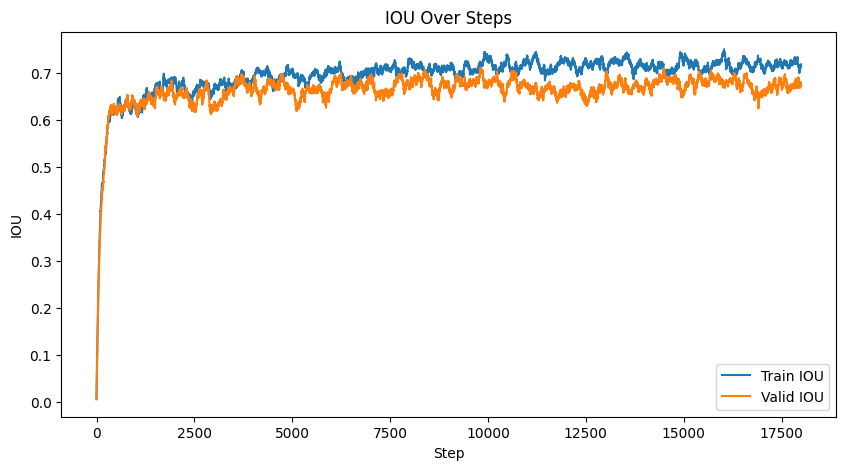

In [33]:
#train_mean_iou = 0
#valid_mean_iou = 0

#for step in range(1, NO_OF_STEPS + 1):
    #train_mean_iou = train(predictor, train_data, step, train_mean_iou)
    #valid_mean_iou = validate(predictor, test_data, step, valid_mean_iou)

import matplotlib.pyplot as plt

train_mean_iou = 0
valid_mean_iou = 0

train_history = []
valid_history = []

for step in range(1, NO_OF_STEPS + 1):
    # train
    train_mean_iou = train(predictor, train_data, step, train_mean_iou)
    # validate
    valid_mean_iou = validate(predictor, test_data, step, valid_mean_iou)

    # store iou for plotting
    train_history.append(train_mean_iou)
    valid_history.append(valid_mean_iou)

# -- After the training loop completes --
plt.figure(figsize=(10,5))
plt.plot(train_history, label='Train IOU')
plt.plot(valid_history, label='Valid IOU')
plt.title('IOU Over Steps')
plt.xlabel('Step')
plt.ylabel('IOU')
plt.legend()
plt.show()